In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
original_df = pd.read_csv("SatisfyLeague.csv")
df = pd.read_csv("SatisfyLeague.csv")
# print(len(df))
runtime15=df[df['runtime'] >= 15].index
df.drop(runtime15, inplace=True)
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['runtime'].values
train_df, validation_df = train_test_split(train_df, test_size=0.2)
# train_df.reset_index(drop=True)
print(len(train_df))

/home/jack/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (99) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


12689


In [5]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,satisfy
count,12689.000000,12689.000000,12689.000000,12689.0,12689.0,12689.0,12689.000000,12689.000000,12689.000000,12689.0,...,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000,12689
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
mean,2.750145,4.985999,1.748277,0.0,0.0,0.0,0.694866,0.760850,0.480393,0.0,...,0.405736,0.980714,2165.798566,2159.984238,933.414223,11.607219,4.837261,2.903302,0.363837,NaN
std,0.075551,0.580576,0.156798,0.0,0.0,0.0,0.138024,0.095268,0.077270,0.0,...,0.162654,0.007435,1261.609287,1293.591199,548.043954,3.413685,3.161068,1.411657,1.391963,NaN
min,2.432620,3.669870,1.427480,0.0,0.0,0.0,0.412949,0.503628,0.278322,0.0,...,0.112381,0.950000,337.000000,337.000000,152.250000,6.000000,1.000000,1.000000,0.020000,NaN
25%,2.712330,4.568970,1.618230,0.0,0.0,0.0,0.595374,0.697669,0.420587,0.0,...,0.226131,0.976982,1127.000000,1096.000000,483.360000,9.000000,2.000000,2.000000,0.040000,NaN
50%,2.769600,5.063880,1.760640,0.0,0.0,0.0,0.689464,0.769911,0.480466,0.0,...,0.474443,0.982567,1832.000000,1859.000000,790.041000,11.000000,4.000000,3.000000,0.080000,NaN
75%,2.802680,5.444530,1.870780,0.0,0.0,0.0,0.814468,0.827151,0.539198,0.0,...,0.527566,0.986376,3133.000000,3068.000000,1343.980000,15.000000,7.000000,4.000000,0.140000,NaN


In [6]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
    averages = []
    if copy_lst[average_feature].max()%1 == 0:
        for value in range(1, copy_lst[average_feature].max()+1):
            value_indices = np.where(copy_lst[average_feature]==value)
            total=0
            for value_index in value_indices[0]:
                total += int(copy_lst[average_result][value_index])
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    else:
        for value in range(1, (int(copy_lst[average_feature].max()//1)+3)):
            value_indices_less = np.where((copy_lst[average_feature]<=value))
            value_indices_greater = np.where((copy_lst[average_feature]>value-1))
            value_indices = [np.intersect1d(value_indices_less, value_indices_greater)]
            print(np.average(value_indices[0]))
            total=0
            for value_index in value_indices[0]:
                total += copy_lst[average_result][value_index]
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    return averages

In [7]:
train_y = train_df['runtime'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

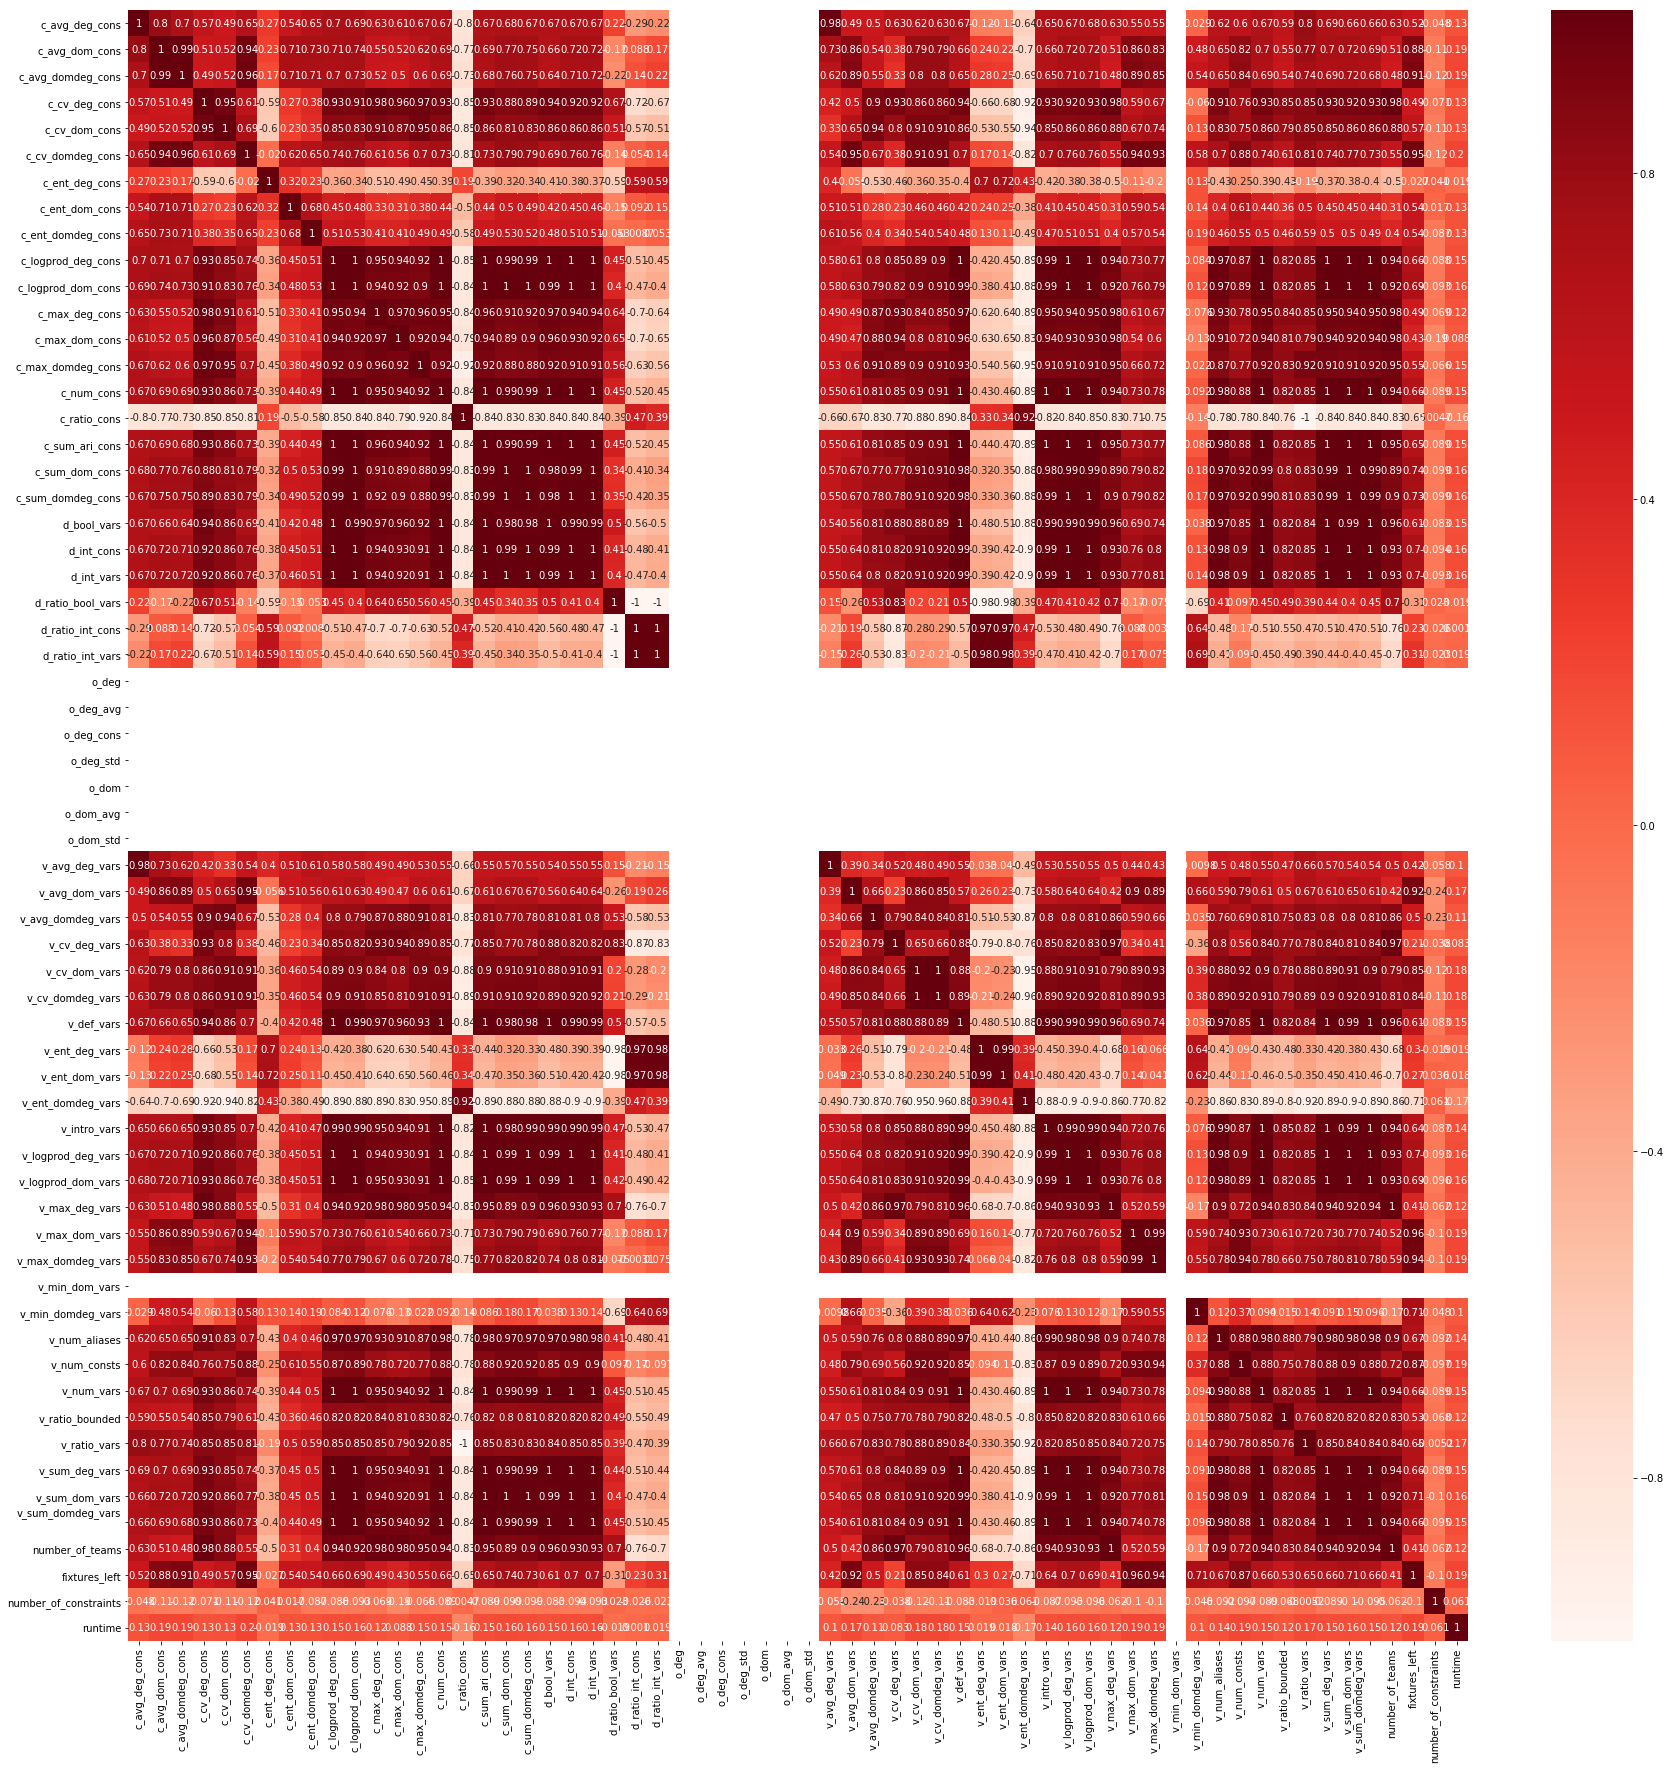

In [8]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['runtime'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['runtime']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [10]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

['gc_ratio_diff']


In [11]:
league_dt = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("estimator", DecisionTreeRegressor(max_depth=40))
])

model = league_dt.fit(train_df, train_y)

In [12]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='neg_mean_squared_error', cv=10))

-1.925488983063125

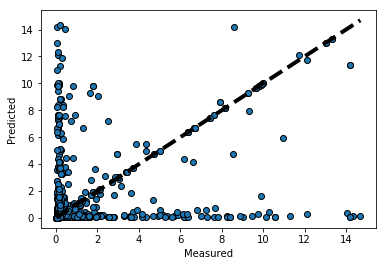

In [19]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

np.corrcoef(predicted, test_y)

array([[1.        , 0.51128259],
       [0.51128259, 1.        ]])

In [15]:
# 1 or 2 pages about the product
# numbers for the satisfiability problem
# Start writing
# finalise figures
